# Stability of source

Author: Luis Miguel Sanchez Brea

Date:   17/01/2018

Purpose: Ecograb project, polariscope callibration

We have diode laser at 850 nm (current = 250 mA)
We have lens for collimating and Thorlabs DG10-600-B diffuser

We have only polarizer 1 Thorlabs LPNIRE100-B (or better, without polarizer)

We have several measurements over time and analyze standard deviation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import pprint
from __future__ import print_function

### Labjack definition

In [3]:
import u3
import LabJackPython


V=1.
mV=V/1000
seconds=1.


def to_bits(variable_integer, num_bits=16, verbose=True):
    """
    takes an integer an generates a list with bits

    Args:
        variable_integer (int): integer with data
        num_bits (int): num of output bits: 8,16, 32, 64
    """
    if num_bits == 8:
        output = map(int, [x for x in '{:08b}'.format(variable_integer)])
    elif num_bits == 16:
        output = map(int, [x for x in '{:016b}'.format(variable_integer)])
    elif num_bits == 32:
        output = map(int, [x for x in '{:032b}'.format(variable_integer)])
    elif num_bits == 64:
        output = map(int, [x for x in '{:064b}'.format(variable_integer)])

    if verbose is True:
        print( output)
    return output

In [4]:
# loads labjack
d=u3.U3()

In [5]:
print("\n Callibration data:")
data_callibration=d.getCalibrationData()
pprint.pprint(data_callibration)


 Callibration data:
{'dac0Offset': -0.6872114308644086,
 'dac0Slope': 50.9896679460071,
 'dac1Offset': -0.701979405945167,
 'dac1Slope': 50.91950369440019,
 'hvAIN0Offset': -10.518997645704076,
 'hvAIN0Slope': 0.00031980290077626705,
 'hvAIN1Offset': -10.489001986570656,
 'hvAIN1Slope': 0.0003192389849573374,
 'hvAIN2Offset': -10.523998295888305,
 'hvAIN2Slope': 0.0003195337485522032,
 'hvAIN3Offset': -10.51609767600894,
 'hvAIN3Slope': 0.00031975959427654743,
 'lvDiffOffset': -2.490987469209358,
 'lvDiffSlope': 7.56862573325634e-05,
 'lvSEOffset': 0.001728925621137023,
 'lvSESlope': 3.775535151362419e-05,
 'tempSlope': 0.01259785215370357,
 'vRef1.5AtCal': 0.0,
 'vRefAtCAl': 2.486867640633136,
 'vRegAtCal': 0.0}


In [6]:
AIN_number=1
ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
print(ainValue)


0.00123857823201


In [7]:
def get_intensity(AIN_number=1, verbose=True):
    ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
    ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
    if verbose is True:
        print("{:2.2f}".format(ainValue), end=', ')
    return ainValue

### Experiment

In [15]:
def battery_measurements(num_measurements, delay, verbose):
    """obtain a number of measurements and stores in array
    
    Args: 
        num_measurements (int): number of measurements
        delay (float): time between measurements
        verbose (bool): if True prints measurements
        
    Returns
        Array:
    
    """
    intensities=sp.zeros(num_measurements, dtype=float)

    for i in range(num_measurements):
        time.sleep(delay)
        intensities[i]=get_intensity(verbose=verbose)

    return intensities

In [16]:
time_experiment=10*seconds
num_measurements=100
delay=time_experiment/num_measurements
times=sp.array(range(num_measurements))*delay

print("measurements each {} seconds".format(delay))

measurements each 0.1 seconds


In [19]:
intensities = battery_measurements(num_measurements, delay, verbose=True)

10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 10.42, 

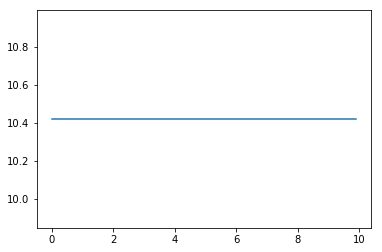

In [20]:
plt.figure()
plt.plot(times, intensities)
plt.show()

## Analysis of results

In [36]:
stability=sp.std(intensities)
mean_volts=sp.mean(intensities)

print("The stability of source in {} seconds is {} Volts".format(times[-1], stability))
print("This means {:2.2f} %".format(stability/mean_volts*100))

The stability of source in 9.9 seconds is 0.00254559894898 Volts
This means 0.13 %


In [44]:
import hickle as hkl 

data = { 'name' : '05_stability_source', 'times' : times, 'intensities': intensities }

# Dump data to file
hkl.dump( data, '05_stability_source.hkl' )

# Load data from file
data2 = hkl.load( '05_stability_source.hkl' )

In [45]:
data2

{'intensities': array([ 2.02239291,  2.02239291,  2.02239291,  2.02750976,  2.02750976,
         2.02239291,  2.02239291,  2.02239291,  2.02239291,  2.02239291,
         2.02239291,  2.02750976,  2.02239291,  2.02750976,  2.02750976,
         2.02750976,  2.02239291,  2.02239291,  2.02239291,  2.02750976,
         2.02750976,  2.02239291,  2.02239291,  2.02239291,  2.02239291,
         2.02239291,  2.02239291,  2.02750976,  2.02239291,  2.02750976,
         2.02239291,  2.02239291,  2.02750976,  2.02750976,  2.02750976,
         2.02239291,  2.02750976,  2.02750976,  2.02239291,  2.02750976,
         2.02239291,  2.02239291,  2.02239291,  2.02750976,  2.02750976,
         2.02239291,  2.02239291,  2.02239291,  2.02239291,  2.02750976,
         2.02239291,  2.02750976,  2.02239291,  2.02750976,  2.02750976,
         2.02239291,  2.02750976,  2.02239291,  2.02239291,  2.02750976,
         2.02750976,  2.02750976,  2.02239291,  2.02239291,  2.02239291,
         2.02750976,  2.02750976,  2

## Final: Close

In [21]:
LabJackPython.Close()